In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from datetime import timedelta as td

In [5]:
client_data = pd.read_csv('ads/ads_clients_data.csv')
data = pd.read_csv('ads/ads_data.csv')

In [6]:
client_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [7]:
data

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [30]:
data_new = data.groupby(['ad_id', 'event'], as_index=False).agg({'platform': 'count'})
data_new.pivot(index='ad_id', columns='event', values='platform').fillna(0.00000001).reset_index()

event,ad_id,click,view
0,2,1.000000e+00,101.0
1,3,3.000000e+00,184.0
2,1902,1.000000e+00,41.0
3,2064,1.000000e-08,35.0
4,2132,1.000000e+00,58.0
...,...,...,...
960,122004,4.000000e+00,100.0
961,122013,1.000000e-08,156.0
962,122023,1.000000e-08,68.0
963,122031,1.000000e+00,138.0


In [14]:
data_new.click.mean()

113.13782383875619

In [15]:
data_new.view.mean()

923.13160621771

In [16]:
np.log(data_new.view)

0      4.615121
1      5.214936
2      3.713572
3      3.555348
4      4.060443
         ...   
960    4.605170
961    5.049856
962    4.219508
963    4.927254
964    3.737670
Name: view, Length: 965, dtype: float64

/Users/arkadijorehov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view', ylabel='Density'>

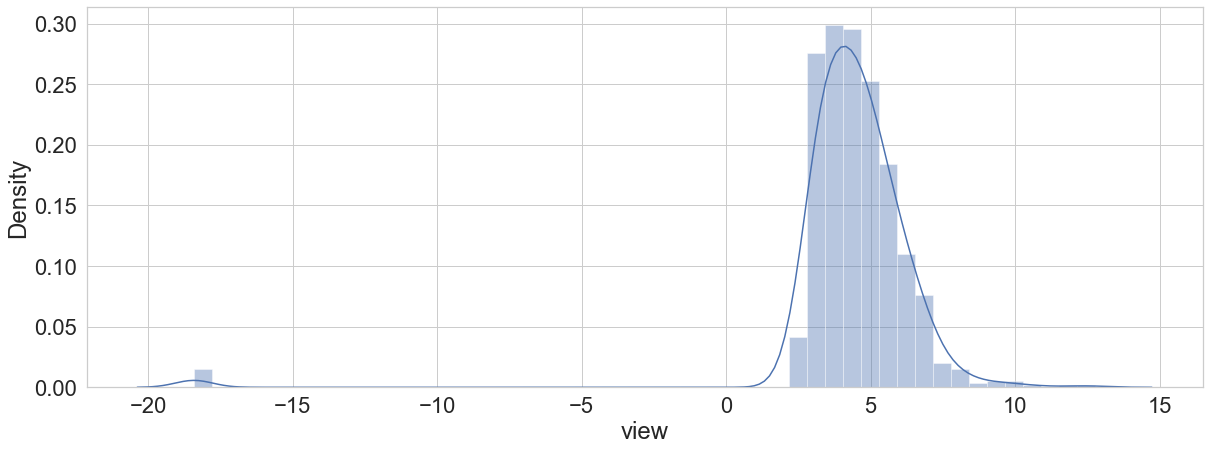

In [17]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
sns.distplot(np.log(data_new.view))

In [46]:
data_new1 = data.groupby(['date', 'ad_id', 'event'], as_index=False).agg({'platform': 'count'}) \
                .pivot_table('platform', index='date', columns='event')
data_new1_rol = data_new1[['view']].rolling(2).mean().fillna(1)

<AxesSubplot:xlabel='date', ylabel='view'>

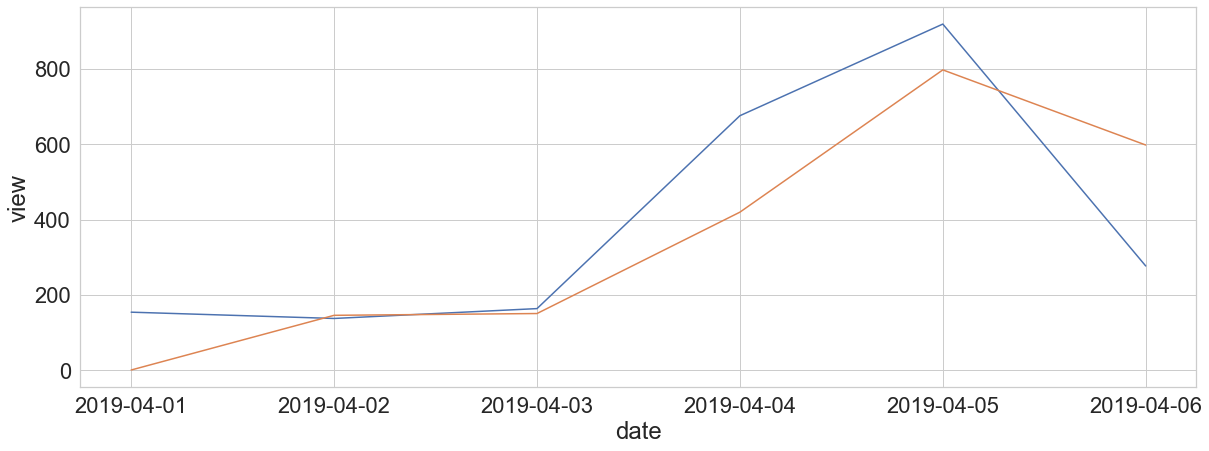

In [47]:
sns.lineplot(data=data_new1, x='date', y='view')
sns.lineplot(data=data_new1_rol, x='date', y='view')

In [61]:
data_anom = data.query('event ==  "view" and date == "2019-04-06"').groupby('ad_id', as_index=False).agg({'platform': 'count'})
data_anom.sort_values('platform', ascending=False)




,ad_id,platform
191,112583,48991
65,28142,3280
95,38892,1337
90,37720,835
26,18425,426
...,...,...
28,18681,1
62,27581,1
84,35615,1
164,106809,1


In [62]:
whole_data = data.merge(client_data, how='inner', on='client_union_id')

In [63]:
whole_data

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04


In [65]:
whole_data.date_x = pd.to_datetime(whole_data.date_x)
whole_data.create_date = pd.to_datetime(whole_data.create_date)
whole_data['days'] = whole_data.date_x - whole_data.create_date

In [112]:
active_clients = whole_data.groupby('client_union_id', as_index=False).agg({'days': 'min'}).sort_values('days')

In [113]:
d = td(days=365)
conv = (active_clients[active_clients.days <= d].shape[0] / client_data.shape[0] * 100)

In [114]:
conv

0.6864463703533806

In [118]:
pd.to_timedelta([0, 30, 90, 180, 365], unit='d')

TimedeltaIndex(['0 days', '30 days', '90 days', '180 days', '365 days'], dtype='timedelta64[ns]', freq=None)

In [119]:
active_clients['interval_days'] = pd.cut(active_clients.days, bins=pd.to_timedelta([0, 30, 90, 180, 365], unit='d'))

In [130]:
ac = active_clients.groupby('interval_days', as_index=False).agg({'client_union_id': 'count'})

<AxesSubplot:xlabel='interval_days', ylabel='client_union_id'>

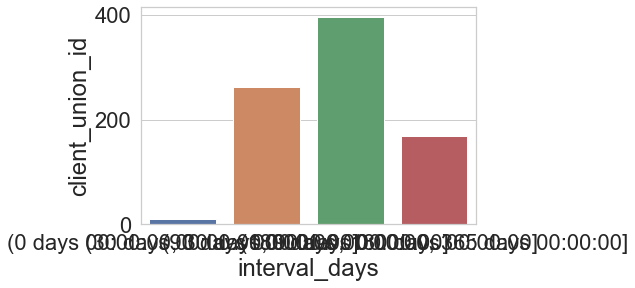

In [131]:
sns.barplot(x='interval_days', y='client_union_id', data=ac)